<a href="https://colab.research.google.com/github/ncphung1405/DO_AN_PTDL_R/blob/main/d%E1%BB%AF_li%E1%BB%87u_lazada_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hiển thị Trực quan hóa Dữ liệu Khách hàng của Lazada Indonesia**

Mục đích của việc làm này là để hiển thị dữ liệu khách hàng của Lazada Indonesia bằng cách sử dụng Pandas DataFrame.

-Nguồn tập dữ liệu : https://www.kaggle.com/grikomsn/lazada-indonesian-reviews

##**1.Khám phá dữ liệu**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Gắn tại Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#tập dữ liệu
df = pd.read_csv('/content/drive/MyDrive/20191002-reviews.csv.zip')

In [ ]:
#kiểu dữ liệu mỗi cột
df.dtypes

itemId              int64
category           object
name               object
rating              int64
originalRating    float64
reviewTitle        object
reviewContent      object
likeCount           int64
upVotes             int64
downVotes           int64
helpful              bool
relevanceScore    float64
boughtDate         object
clientType         object
retrievedDate      object
dtype: object

In [ ]:
#số hàng và cột
df.shape

(203787, 15)

In [ ]:
#hiển thị 5 hàng trên cùng có trong tập dữ liệu
df.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


##**2. Làm sạch dữ liệu**


In [ ]:
#tên cột trong tập dữ liệu
df.columns

Index(['itemId', 'category', 'name', 'rating', 'originalRating', 'reviewTitle',
       'reviewContent', 'likeCount', 'upVotes', 'downVotes', 'helpful',
       'relevanceScore', 'boughtDate', 'clientType', 'retrievedDate'],
      dtype='object')

In [ ]:
#loại bỏ các cột không cần thiết
df.drop(['itemId', 'name', 'reviewContent', 'originalRating', 'reviewTitle', 'likeCount', 'upVotes', 'downVotes', 'helpful', 'boughtDate', 'retrievedDate'],axis=1,inplace=True) 

In [ ]:
#hiển thị cột bắt buộc
df.head()

,category,rating,relevanceScore,clientType
0,beli-harddisk-eksternal,5,26.51,androidApp
1,beli-harddisk-eksternal,4,22.49,androidApp
2,beli-harddisk-eksternal,5,21.50,androidApp
3,beli-harddisk-eksternal,4,20.51,androidApp
4,beli-harddisk-eksternal,5,16.01,androidApp


-xử lý các mục nhập trùng lặp

In [ ]:
#kiểm tra các mục nhập trùng lặp
df.duplicated().sum()

177940

In [ ]:
#xóa bỏ dữ liệu trùng lặp

df = df.drop_duplicates()

In [ ]:
#kiểm tra các mục nhập trùng lặp
df.duplicated().sum()

0

- xử lý các giá trị bị thiếu

In [ ]:
#kiểm tra các giá trị bị thiếu
df.isnull().sum()

category          0
rating            0
relevanceScore    0
clientType        0
dtype: int64

- Xử lý các giá trị không tự nhiên

In [ ]:
#giá trị nhỏ nhất
df.min()

category          beli-harddisk-eksternal
rating                                  1
relevanceScore                       0.96
clientType                     androidApp
dtype: object

In [ ]:
#giá trị lớn nhất
df.max()

category          shop-televisi-digital
rating                                5
relevanceScore                     76.5
clientType                   mobile-app
dtype: object

In [ ]:
df.skew()

rating           -0.897521
relevanceScore    0.603911
dtype: float64

In [ ]:
df

,category,rating,relevanceScore,clientType
0,beli-harddisk-eksternal,5,26.51,androidApp
1,beli-harddisk-eksternal,4,22.49,androidApp
2,beli-harddisk-eksternal,5,21.50,androidApp
3,beli-harddisk-eksternal,4,20.51,androidApp
4,beli-harddisk-eksternal,5,16.01,androidApp
...,...,...,...,...
203772,shop-televisi-digital,4,21.29,desktop
203776,shop-televisi-digital,1,14.79,androidApp
203779,shop-televisi-digital,1,10.35,mobile-app
203782,shop-televisi-digital,5,24.63,desktop


Sau khi xử lý làm sạch dữ liệu, tập dữ liệu bao gồm 25.847 hàng và 4 cột.

##**3.Phân tích**


###**Sử dụng trực quan hóa dữ liệu**

#### **1. Phân tích đơn biến**

In [ ]:
df.columns

Index(['category', 'rating', 'relevanceScore', 'clientType'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


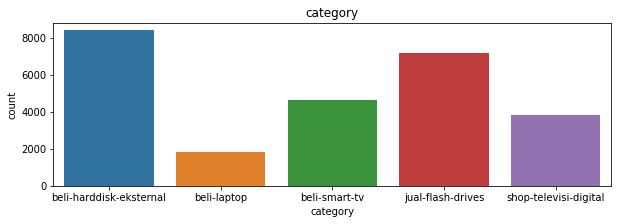

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


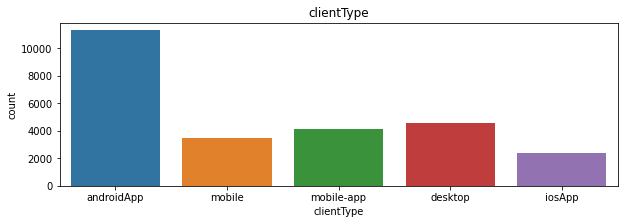

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


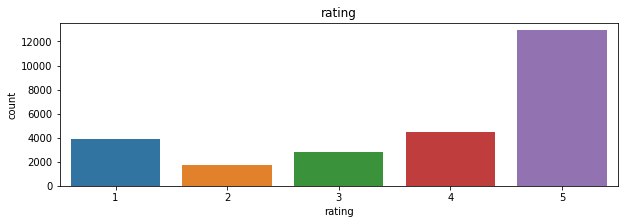

In [ ]:
cat = ['category', 'clientType', 'rating']

for col in cat:
  plt.figure(figsize=(10,3))
  sns.countplot(df[col])
  plt.title(col)
  plt.show()

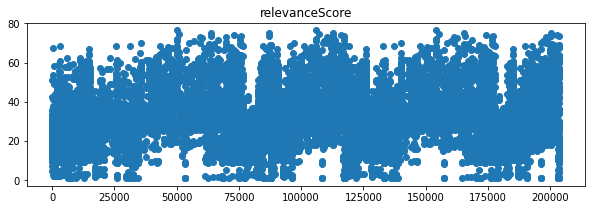

In [ ]:
cat = ['relevanceScore']

for col in cat:
  plt.figure(figsize=(10,3))
  plt.scatter(df.index,df[col])
  plt.title(col)
  plt.show()

**Phân tích :** 

1. Hơn 8.000 khách hàng của Lazada đã mua hàng cho danh mục sản phẩm Ổ cứng gắn ngoài.
2. Hơn 10.000 khách hàng của Lazada thực hiện giao dịch trên Android.
3. Hơn 12.000 khách hàng của Lazada đưa ra đánh giá 5 cho các sản phẩm họ đã mua.
Khách hàng của Lazada có xu hướng hài lòng với sản phẩm họ mua với khoảng điểm mức độ phù hợp từ 30 - 40.



**2. Phân tích đa biến**

Trong phần này, phân tích đa biến được sử dụng để hình dung việc so sánh một số cột có mối tương quan mạnh nhất.

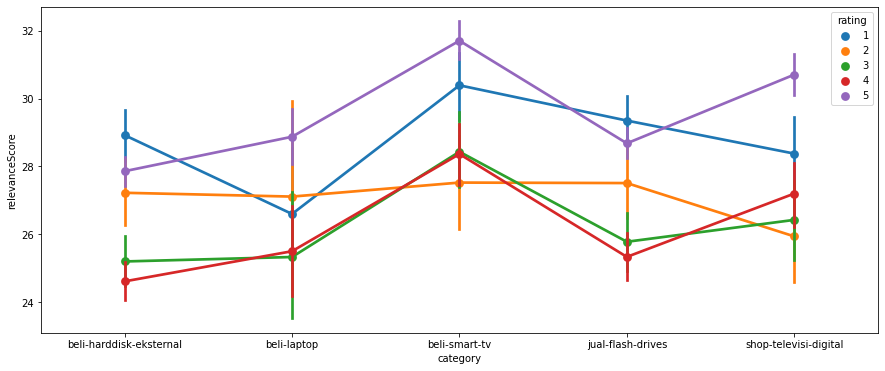

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x="category", y="relevanceScore", hue="rating", data=df)
plt.show()

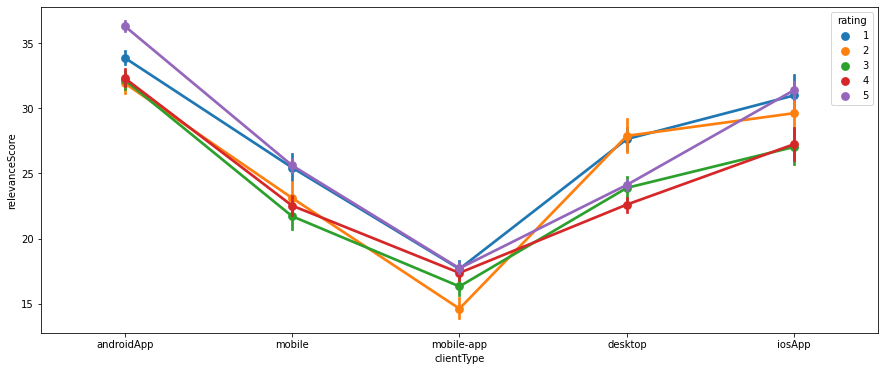

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x="clientType", y="relevanceScore", hue="rating", data=df)
plt.show()

##**Kết luận**


- Khách hàng mua hàng trong danh mục sản phẩm Máy tính xách tay, TV thông minh và TV kỹ thuật số có xu hướng đưa ra xếp hạng tốt và hài lòng với chất lượng sản phẩm họ đã mua.
- Mặc dù các giao dịch mua hàng diễn ra trên nhiều thiết bị di động khác nhau, nhưng hầu hết các giao dịch mà khách hàng của Lazada thực hiện đều có xếp hạng cao và có mức độ phù hợp cao với sản phẩm họ đã mua.